In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('D:/Master/Boot camp/Suspects_Dataset.csv')

df.head()

,Index_Monster,Monster,Criminal record,Age,Gender,Height in cm,Speed Level,Strength Level,Allergy,Favorite Food
0,8477,Zombie,No,1430.0,M,156.0,1.0,4.0,silver,humans
1,317,Zombie,No,588.0,M,151.0,37.0,6.0,sunlight,pesto pasta
2,2200,Zombie,Yes,122.0,M,194.0,23.0,7.0,silver,pesto pasta
3,616,Skeleton,No,716.0,M,195.0,30.0,5.0,sunlight,brain
4,9973,Ghost,Yes,332.0,F,185.0,55.0,5.0,silver,lasagna


In [2]:
df.isnull().sum()

Index_Monster       0
Monster            97
Criminal record     1
Age                 6
Gender              1
Height in cm        1
Speed Level         2
Strength Level      5
Allergy             1
Favorite Food       3
dtype: int64

In [3]:
df['Monster'] = df['Monster'].fillna('Unknown')

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Height in cm'] = df['Height in cm'].fillna(df['Height in cm'].mean())
df['Speed Level'] = df['Speed Level'].fillna(df['Speed Level'].median())
df['Strength Level'] = df['Strength Level'].fillna(df['Strength Level'].mean())

df['Allergy'] = df['Allergy'].fillna(df['Allergy'].mode()[0])
df['Favorite Food'] = df['Favorite Food'].fillna(df['Favorite Food'].mode()[0])

df.isnull().sum()

Index_Monster      0
Monster            0
Criminal record    1
Age                0
Gender             1
Height in cm       0
Speed Level        0
Strength Level     0
Allergy            0
Favorite Food      0
dtype: int64

In [4]:
df['Criminal record'] = df['Criminal record'].fillna('Unknown')
df['Gender'] = df['Gender'].fillna('Unknown')

df.isnull().sum()

Index_Monster      0
Monster            0
Criminal record    0
Age                0
Gender             0
Height in cm       0
Speed Level        0
Strength Level     0
Allergy            0
Favorite Food      0
dtype: int64

In [5]:
df.describe()

,Index_Monster,Age,Height in cm,Speed Level,Strength Level
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000
mean,5000.000000,601.687344,174.514400,36.463754,5.162565
std,2887.184355,694.611175,14.452404,23.993631,2.670109
min,0.000000,1.000000,150.000000,1.000000,1.000000
25%,2500.000000,108.000000,162.000000,17.000000,3.000000
50%,5000.000000,379.000000,175.000000,30.000000,5.000000
75%,7500.000000,778.000000,187.000000,51.000000,7.000000
max,10000.000000,5187.000000,199.000000,100.000000,10.000000


In [6]:
potential_suspects = df[(df['Strength Level'] > 8) &
                        (df['Speed Level'] > 70) &
                        (df['Age'] > 2000)]

potential_suspects

,Index_Monster,Monster,Criminal record,Age,Gender,Height in cm,Speed Level,Strength Level,Allergy,Favorite Food
39,8337,Ghost,Yes,2604.0,F,185.0,78.0,10.0,sunlight,lasagna
86,2716,Ghost,No,2190.0,M,152.0,90.0,10.0,silver,pesto pasta
1345,5798,Vampire,No,2817.0,M,176.0,84.0,9.0,sunlight,pesto pasta
1373,2010,Werewolf,No,2657.0,F,153.0,78.0,10.0,sunlight,lasagna
1398,8522,Werewolf,Yes,2561.0,M,161.0,72.0,9.0,garlic,pesto pasta
1440,5581,Zombie,No,2273.0,F,158.0,88.0,9.0,pumpkin,brain
1701,6083,Skeleton,No,2001.0,F,195.0,100.0,9.0,pumpkin,HUMANS
1927,8167,Werewolf,No,2209.0,M,169.0,86.0,10.0,garlic,lasagna
2010,4892,Zombie,No,2260.0,F,162.0,100.0,10.0,sunlight,pesto pasta
2208,6764,Ghost,No,3946.0,M,196.0,89.0,10.0,sunlight,brain


In [7]:
df_encoded = pd.get_dummies(df, columns=['Monster', 'Allergy', 'Favorite Food'])

df_encoded.head()

,Index_Monster,Criminal record,Age,Gender,Height in cm,Speed Level,Strength Level,Monster_GHOST,Monster_Ghost,Monster_SKELETON,...,Favorite Food_Lasagna,Favorite Food_PESTO PASTA,Favorite Food_Pesto pasta,Favorite Food_RATS,Favorite Food_Rats,Favorite Food_brain,Favorite Food_humans,Favorite Food_lasagna,Favorite Food_pesto pasta,Favorite Food_rats
0,8477,No,1430.0,M,156.0,1.0,4.0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,317,No,588.0,M,151.0,37.0,6.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2200,Yes,122.0,M,194.0,23.0,7.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,616,No,716.0,M,195.0,30.0,5.0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,9973,Yes,332.0,F,185.0,55.0,5.0,False,True,False,...,False,False,False,False,False,False,False,True,False,False


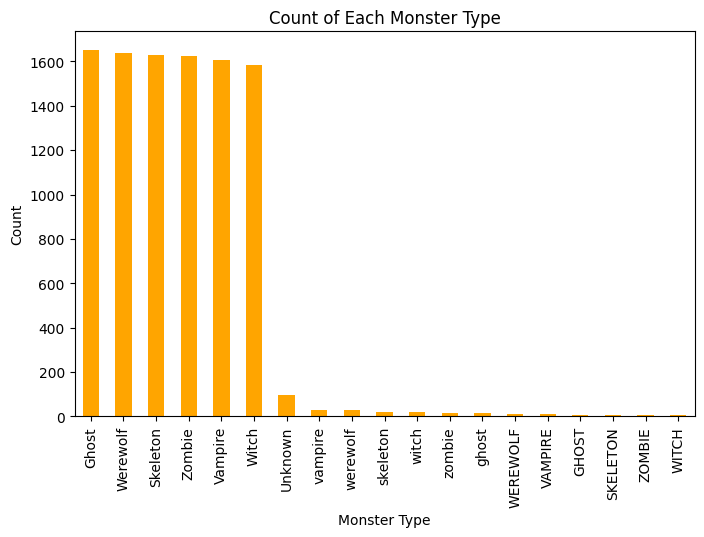

In [8]:
df['Monster'].value_counts().plot(kind='bar', color='orange', figsize=(8, 5))
plt.title('Count of Each Monster Type')
plt.xlabel('Monster Type')
plt.ylabel('Count')
plt.show()

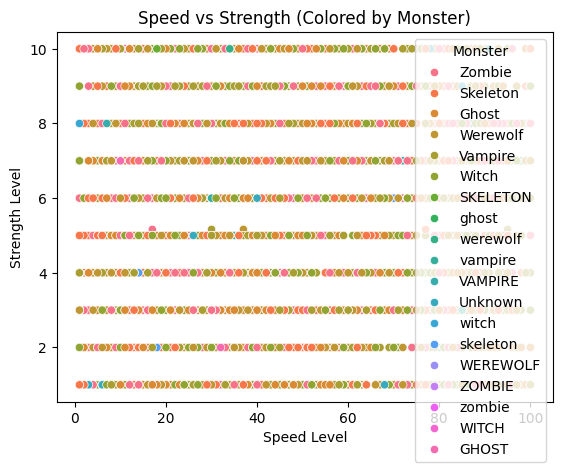

In [9]:
sns.scatterplot(data=df, x='Speed Level', y='Strength Level', hue='Monster')
plt.title('Speed vs Strength (Colored by Monster)')
plt.xlabel('Speed Level')
plt.ylabel('Strength Level')
plt.show()

In [12]:
df_encoded.columns

Index(['Index_Monster', 'Criminal record', 'Age', 'Gender', 'Height in cm',
       'Speed Level', 'Strength Level', 'Monster_GHOST', 'Monster_Ghost',
       'Monster_SKELETON', 'Monster_Skeleton', 'Monster_Unknown',
       'Monster_VAMPIRE', 'Monster_Vampire', 'Monster_WEREWOLF',
       'Monster_WITCH', 'Monster_Werewolf', 'Monster_Witch', 'Monster_ZOMBIE',
       'Monster_Zombie', 'Monster_ghost', 'Monster_skeleton',
       'Monster_vampire', 'Monster_werewolf', 'Monster_witch',
       'Monster_zombie', 'Allergy_CAT HAIR', 'Allergy_Cat hair',
       'Allergy_GARLIC', 'Allergy_Garlic', 'Allergy_HAZELNUT',
       'Allergy_Hazelnut', 'Allergy_Pumpkin', 'Allergy_SILVER',
       'Allergy_SUNLIGHT', 'Allergy_Silver', 'Allergy_Sunlight',
       'Allergy_cat hair', 'Allergy_garlic', 'Allergy_hazelnut',
       'Allergy_pumpkin', 'Allergy_silver', 'Allergy_sunlight',
       'Favorite Food_BRAIN', 'Favorite Food_Brain', 'Favorite Food_HUMANS',
       'Favorite Food_Humans', 'Favorite Food_LASAGN

In [15]:
df_encoded['Monster_Zombie'].dtype

dtype('bool')

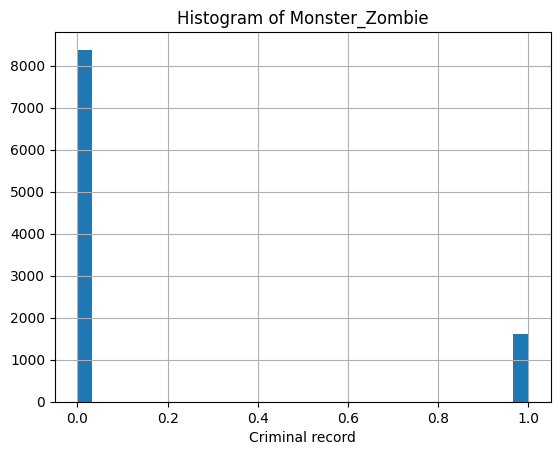

In [16]:
df_encoded['Monster_Zombie'] = df_encoded['Monster_Zombie'].astype(int)
df_encoded['Monster_Zombie'].hist(bins=30)
plt.title('Histogram of Monster_Zombie')
plt.xlabel('Criminal record')
plt.show()

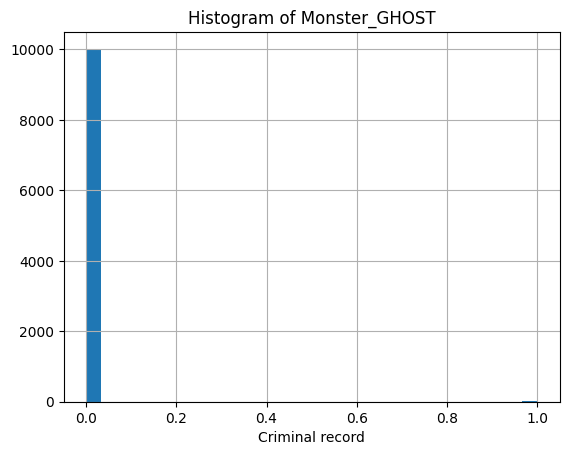

In [18]:
df_encoded['Monster_GHOST'] = df_encoded['Monster_GHOST'].astype(int)
df_encoded['Monster_GHOST'].hist(bins=30)
plt.title('Histogram of Monster_GHOST')
plt.xlabel('Criminal record')
plt.show()

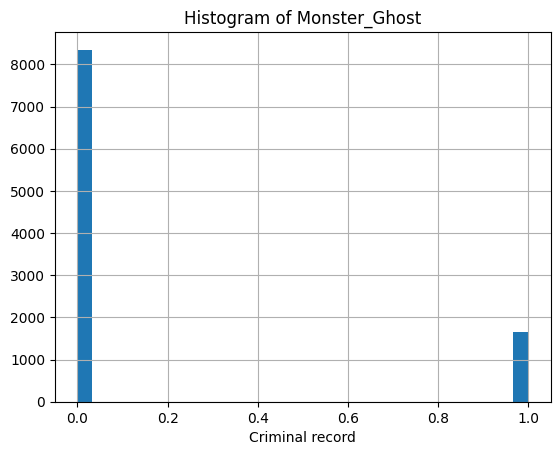

In [19]:
df_encoded['Monster_Ghost'] = df_encoded['Monster_Ghost'].astype(int)
df_encoded['Monster_Ghost'].hist(bins=30)
plt.title('Histogram of Monster_Ghost')
plt.xlabel('Criminal record')
plt.show()

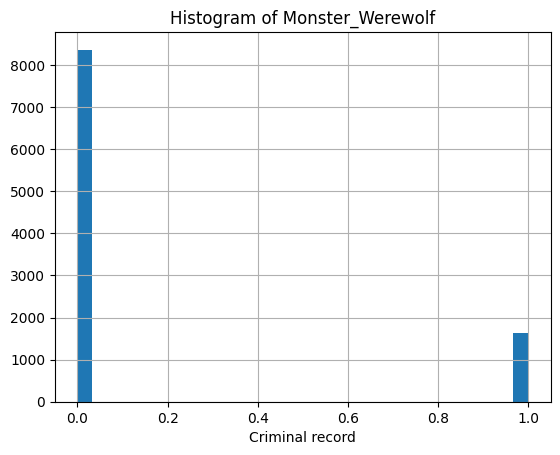

In [20]:
df_encoded['Monster_Werewolf'] = df_encoded['Monster_Werewolf'].astype(int)
df_encoded['Monster_Werewolf'].hist(bins=30)
plt.title('Histogram of Monster_Werewolf')
plt.xlabel('Criminal record')
plt.show()

In [24]:
(df_encoded['Monster_Zombie'] == df_encoded['Monster_Werewolf']).all()

False

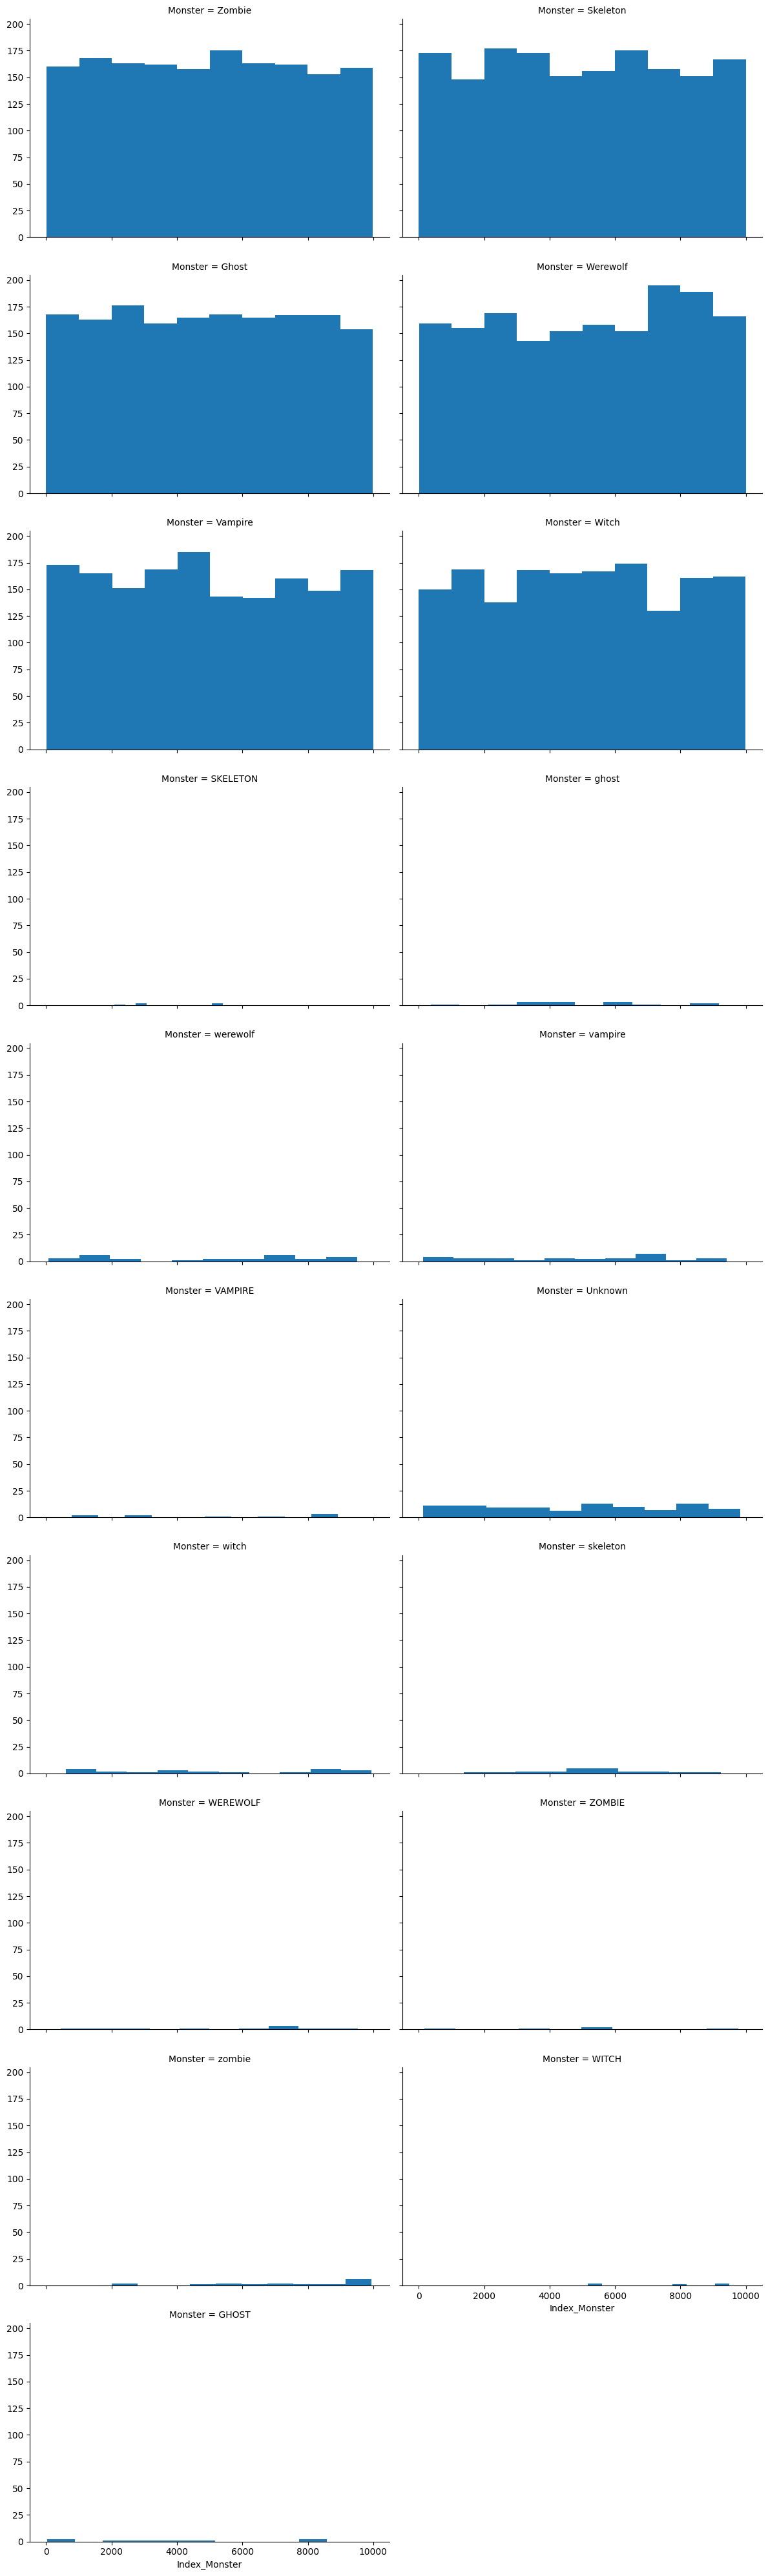

In [30]:
g = sns.FacetGrid(df, col='Monster', col_wrap=2, height=4, aspect=1.5)
g.map(plt.hist, 'Index_Monster', bins=10)
plt.show()